## 35. Time Series Plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [3]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')


In [15]:
df.date.tolist()[::12][0][:4]

'1949'

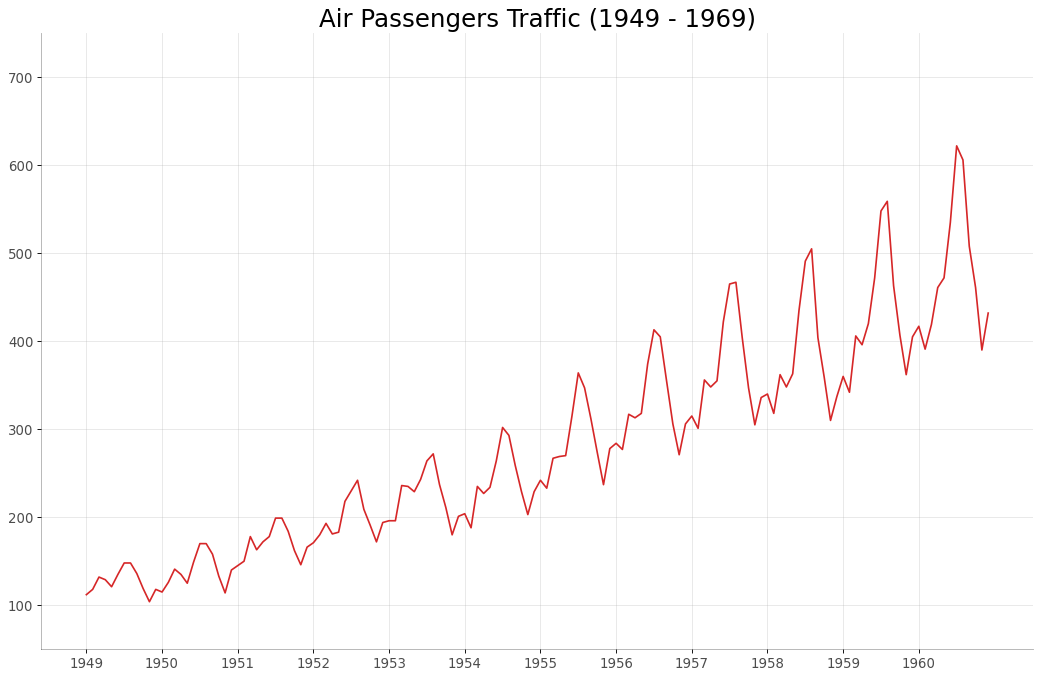

In [21]:
#draw plot
plt.figure(figsize=(16,10),dpi=80)
plt.plot('date','value',data=df,c='tab:red')
#Decoration
plt.ylim(50,750)
xtick_location=df.index.tolist()[::12]
xtick_labels=[x[:4] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

#Romove borders
plt.gca().spines['top'].set_alpha(0.0)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(0.3)
plt.show()

## 36. Time Series with peaks and through 

### 找peak和trough的方法：so smart!
np.sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. nan is returned for nan inputs.


In [35]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# Get the Peaks and Troughs
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peck_locations=np.where(doublediff==-2)[0]+1
trough_locations=np.where(doublediff==2)[0]+1


In [34]:
#Draw plots
plt.figure(figsize=(16,10),dpi=80)



# plt.plot('date','value',data=df)

array([  2,  11,  14,  26,  38,  43,  50,  55,  60,  62,  66,  72,  78,
        84,  86,  90,  96,  98, 103, 108, 110, 115, 120, 122, 127, 132,
       138])

In [27]:
np.diff(data)

array([   6,   14,   -3,   -8,   14,   13,    0,  -12,  -17,  -15,   14,
         -3,   11,   15,   -6,  -10,   24,   21,    0,  -12,  -25,  -19,
         26,    5,    5,   28,  -15,    9,    6,   21,    0,  -15,  -22,
        -16,   20,    5,    9,   13,  -12,    2,   35,   12,   12,  -33,
        -18,  -19,   22,    2,    0,   40,   -1,   -6,   14,   21,    8,
        -35,  -26,  -31,   21,    3,  -16,   47,   -8,    7,   30,   38,
         -9,  -34,  -30,  -26,   26,   13,   -9,   34,    2,    1,   45,
         49,  -17,  -35,  -38,  -37,   41,    6,   -7,   40,   -4,    5,
         56,   39,   -8,  -50,  -49,  -35,   35,    9,  -14,   55,   -8,
          7,   67,   43,    2,  -63,  -57,  -42,   31,    4,  -22,   44,
        -14,   15,   72,   56,   14, -101,  -45,  -49,   27,   23,  -18,
         64,  -10,   24,   52,   76,   11,  -96,  -56,  -45,   43,   12,
        -26,   28,   42,   11,   63,   87,  -16,  -98,  -47,  -71,   42])

In [28]:
np.sign(np.diff(data))

array([ 1,  1, -1, -1,  1,  1,  0, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  0, -1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  0,  1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1])